In [1]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
EPOCH = 50
IMAGE_SIZE = 224
CHANNELS = 3
BATCH_SIZE = 32 
INPUT_SHAPE = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = "../data/formatted/224_formatted", 
    seed = 123,
    shuffle=True, 
    image_size = (IMAGE_SIZE, IMAGE_SIZE), 
    batch_size = BATCH_SIZE
)

Found 912 files belonging to 2 classes.


In [6]:
class_names = dataset.class_names
class_names

['healthy_coral', 'sctld_coral']

In [10]:
for image_batch, labels_batch in dataset.take(1):
    print(f"random batch shape: {image_batch.shape}")

random batch shape: (32, 224, 224, 3)


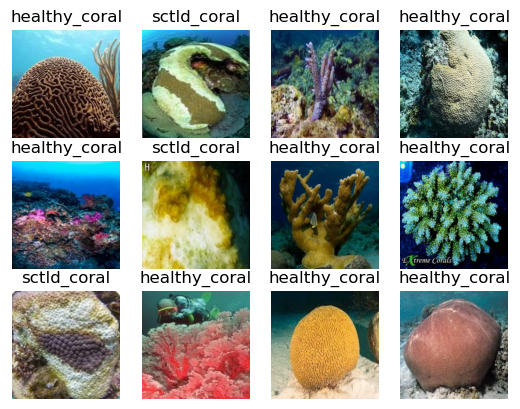

In [12]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12): 
        ax = plt.subplot(3,4,i+1) 
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
      

In [7]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size=1000): 
    assert (train_split + test_split + val_split == 1)
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds =  dataset.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [18]:
len(test_ds)

4

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"), 
    layers.RandomRotation(0.1)
])

# train_ds = train_ds.map(
#     lambda x, y: (data_augmentation(x, training=True), y)
# ).prefetch(buffer_size=tf.data.AUTOTUNE)

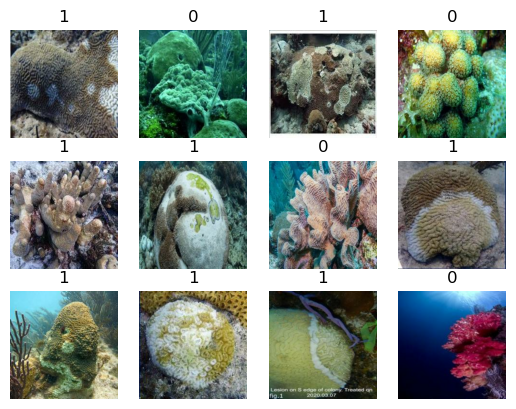

In [26]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12): 
        ax = plt.subplot(3,4,i+1) 
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(label_batch[i].numpy())
        plt.axis("off")

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build()



C:\Users\qiany\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.metrics import *
metrics = ['accuracy']
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=metrics 
)

from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Metric to monitor
    patience=5,              # Number of epochs to wait for improvement before stopping
    mode='max',              # Look for maximum value (for accuracy)
    restore_best_weights=True # Restore the weights of the best epoch
)


In [34]:
for image_batch, labels_batch in dataset.take(1): 
    print(image_batch.shape)
    print(labels_batch)

(32, 224, 224, 3)
tf.Tensor([1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1], shape=(32,), dtype=int32)


In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='best_model_weights.weights.h5', 
    save_weights_only=True,          
    monitor='val_loss',            
    mode='min',                       
    save_best_only=True               
)

In [38]:
history= model.fit(
    train_ds,
    epochs = EPOCH,
    batch_size = BATCH_SIZE, 
    verbose = 1, 
    validation_data = val_ds,
   callbacks=[checkpoint_callback]
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 328ms/step - accuracy: 0.5318 - loss: 0.6875 - val_accuracy: 0.8438 - val_loss: 0.4702
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 280ms/step - accuracy: 0.6947 - loss: 0.5822 - val_accuracy: 0.8594 - val_loss: 0.4393
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.7389 - loss: 0.5207 - val_accuracy: 0.8750 - val_loss: 0.4764
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - accuracy: 0.7098 - loss: 0.5603 - val_accuracy: 0.8594 - val_loss: 0.3555
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.7732 - loss: 0.4622 - val_accuracy: 0.8438 - val_loss: 0.3465
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.7664 - loss: 0.4536 - val_accuracy: 0.8281 - val_loss: 0.3334
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - accuracy: 0.7723 - loss: 0.4319 - val_accuracy: 0.8750 - val_loss: 0.2882
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 365ms/step - accuracy: 0.7995 - loss: 0.4244 - val_accuracy: 0

score = model.evaluate(test_ds)

⭐MODEL EVALUATION AND MERTICS

In [3]:
from tensorflow.keras.models import load_model

# Replace 'path_to_your_model.keras' with the actual path to your .keras file
model = load_model('../models/new_models/1.keras')


In [2]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

model.load_weights('best_model_weights.weights.h5')

NameError: name 'model' is not defined

In [11]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9516 - loss: 0.2681
Test Loss: 0.41570720076560974
Test Accuracy: 0.9285714030265808


In [12]:
import numpy as np

y_true = []
y_pred = []

for batch in test_ds:  
    x_batch, y_batch = batch 
    y_true.extend(y_batch.numpy())  
    predictions = model.predict(x_batch)  
    y_pred.extend(predictions)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

y_pred_binary = (y_pred > 0.5).astype(int) 



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


In [13]:
import numpy as np

y_pred_binary_1d = np.argmax(y_pred_binary, axis=1)
print(f"y_true shape: {y_true.shape}")
print(f"y_pred_binary_1d shape: {y_pred_binary_1d.shape}")


y_true shape: (112,)
y_pred_binary_1d shape: (112,)


In [19]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report

f1 = f1_score(y_true, y_pred_binary_1d)
recall = recall_score(y_true, y_pred_binary_1d)
precision = precision_score(y_true, y_pred_binary_1d)
auc = roc_auc_score(y_true, y_pred_binary_1d)
accuracy= accuracy_score(y_true, y_pred_binary_1d)

print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f'AUC: {auc}')
print(f'ACCURACY: {accuracy}')

print(classification_report(y_true, y_pred_binary_1d))


F1 Score: 0.975609756097561
Recall: 1.0
Precision: 0.9523809523809523
AUC: 0.9711538461538461
ACCURACY: 0.9732142857142857
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.95      1.00      0.98        60

    accuracy                           0.97       112
   macro avg       0.98      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



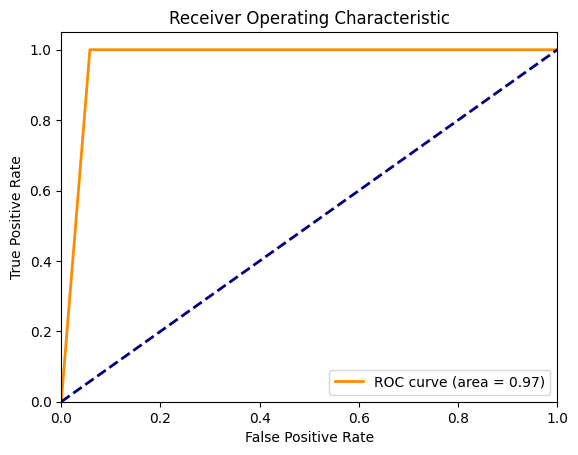

In [24]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_true, y_pred_binary_1d)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



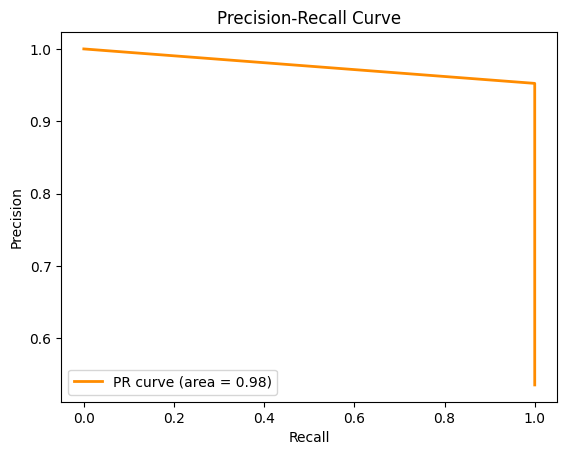

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_binary_1d)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()





In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = []
for train_index, val_index in cv.split(X, y):
    predictions = model.predict(x_val)
    predicted_labels = np.argmax(predictions, axis=1)
    accuracy = np.mean(predicted_labels == y_val)  
    
    cv_scores.append(accuracy)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores):.2f}')
print(f'Standard deviation: {np.std(cv_scores):.2f}')


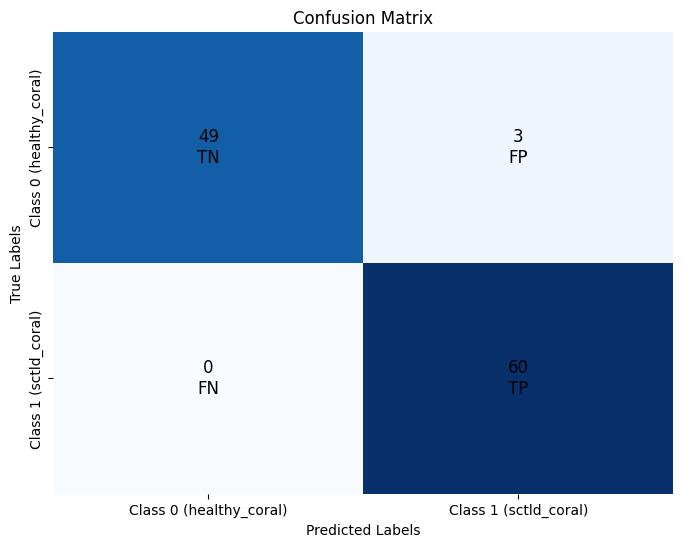

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_binary_1d)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", cbar=False, 
                 xticklabels=["Class 0 (healthy_coral)", "Class 1 (sctld_coral)"], 
                 yticklabels=["Class 0 (healthy_coral)", "Class 1 (sctld_coral)"])
for i in range(2):
    for j in range(2):
        label = ""
        if i == 0 and j == 0:
            label = f"{cm[i, j]}\nTN"
        elif i == 0 and j == 1:
            label = f"{cm[i, j]}\nFP"
        elif i == 1 and j == 0:
            label = f"{cm[i, j]}\nFN"
        elif i == 1 and j == 1:
            label = f"{cm[i, j]}\nTP"
        ax.text(j + 0.5, i + 0.5, label, ha="center", va="center", fontsize=12, color="black")

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [23]:
history.history.keys()

NameError: name 'history' is not defined

In [56]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

Text(0, 0.5, 'ACCURACY')

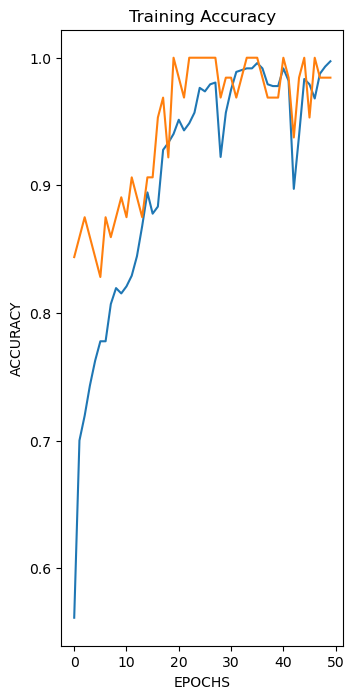

In [58]:
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(50), accuracy, label ='TRAINING ACCURACY')
plt.plot(range(50), val_accuracy, label = 'VALIDATION ACCURACY')
plt.title("Training Accuracy")
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")

In [60]:
def predict(model, img): 
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis = 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence 

Batch size: 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


ValueError: num must be an integer with 1 <= num <= 9, not 10

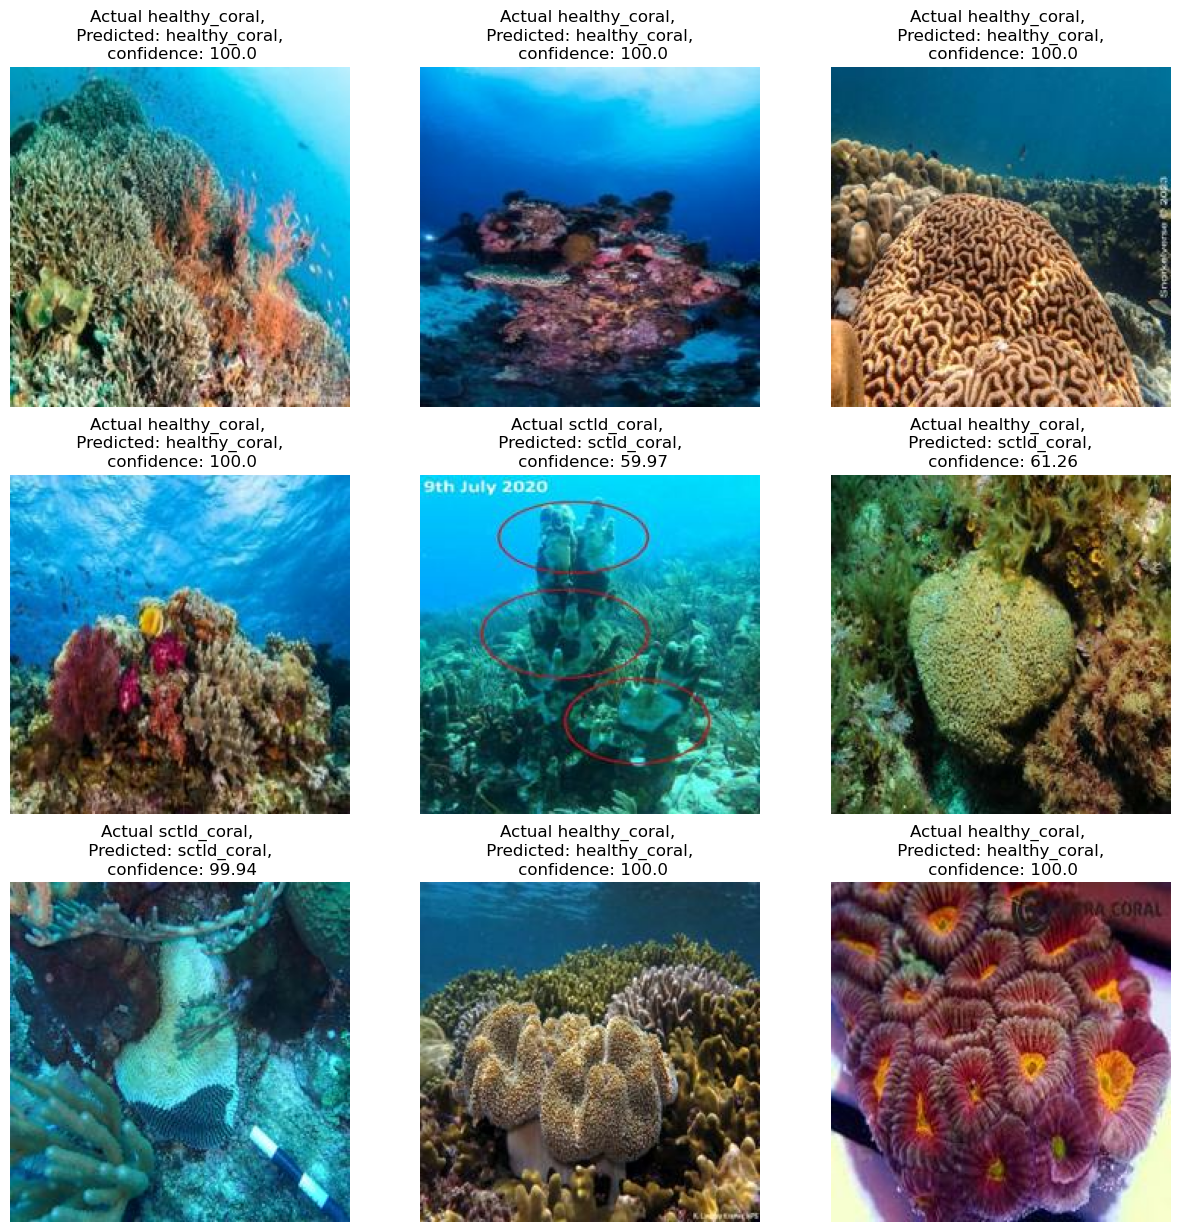

In [64]:
def predict(model, img): 
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, axis = 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence 
plt.figure(figsize = (15, 15))
for images, labels in test_ds.take(1):
    batch_size = images.shape[0]
    print(f"Batch size: {batch_size}")
   # plt.imshow(images.numpy().astype("uint8"))
    for i in range(32):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual {actual_class}, \n Predicted: {predicted_class}, \n confidence: {confidence}")
        plt.axis("off")
        

In [66]:
from tensorflow.keras.models import load_model

model_version = 1

In [70]:
model.save(f"../models/new_models/1_ver/{model_version}.keras")

In [74]:
model.export(f"../models/new_models/1_ver/{model_version}")

INFO:tensorflow:Assets written to: ../models/new_models/1_ver/1\assets


INFO:tensorflow:Assets written to: ../models/new_models/1_ver/1\assets


Saved artifact at '../models/new_models/1_ver/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2264266960784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264266958672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291602320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291591952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291590800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291594640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291602896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291604432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291604240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291605008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2264291603088: TensorS

In [76]:
model.save_weights(f"../models/new_models/1_ver/{model_version}_weights.weights.h5")

In [ ]:
with open("model_architecture.json", "w") as json_file:
    json_file.write(model.to_json())


In [4]:
model = tf.keras.models.load_model("../../../models/new_models/1.keras")

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,184 (1.96 MB)

 Trainable params: 171,394 (669.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 342,790 (1.31 MB)

In [1]:
!python --version


Python 3.12.4


In [2]:
!pip show tensorflow

In [3]:

!pip uninstall tensorflow -y

In [4]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
! pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Python312\Lib\site-packages
Requires: tensorflow-intel
Required-by: tensorflow-serving-api


In [6]:
img_path = "../../../data/formatted/224_formatted/sctld_coral/0.jpeg"

In [7]:
!pip install opencv-python
import cv2


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
# Save the resized image (ensure a file extension)
cv2.imwrite("resized_image.jpg", img)

# Display the resized image
cv2.imshow("hi", img)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()  # Close the window

In [9]:

import numpy as np

In [10]:
img_array = np.expand_dims(img, axis=0)
img_array.shape

(1, 224, 224, 3)

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.load_model("../../../models/new_models/1.keras")

In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,184 (1.96 MB)

 Trainable params: 171,394 (669.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 342,790 (1.31 MB)

In [15]:
output = model(img_array)
print(output)

tf.Tensor([[9.997360e-01 2.640379e-04]], shape=(1, 2), dtype=float32)


In [32]:
def get_gradcam_heatmap(model, img_array, layer_name):
    # Get the last convolutional layer for Grad-CAM
    model.precict(img_array)
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        # Watch the input image
        tape.watch(img_array)
        # Get the model's predictions and the feature map
        conv_output, predictions = grad_model(img_array)
        class_id = np.argmax(predictions[0])  # Get class with highest score

    # Get gradients of the predicted class w.r.t. the last convolutional layer
    grads = tape.gradient(predictions[:, class_id], conv_output)

    # Pool the gradients over all the pixels in the feature map
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel of the feature map by the corresponding gradient
    conv_output = conv_output[0]
    for i in range(conv_output.shape[-1]):
        conv_output[..., i] *= pooled_grads[i]

    # Create the heatmap by averaging the feature maps across all channels
    heatmap = np.mean(conv_output, axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

[<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=input_layer>]

In [21]:
last_layer_output = model.get_layer('dense_1').output
print(last_layer_output)


<KerasTensor shape=(None, 2), dtype=float32, sparse=False, name=keras_tensor_138>


In [17]:
output = model(img_array)
print(output)

tf.Tensor([[9.997360e-01 2.640379e-04]], shape=(1, 2), dtype=float32)


In [26]:
grad_model = tf.keras.models.Model(
    inputs=[model.get_layer("sequential").input],
    outputs=[model.get_layer("conv2d_5").output, last_layer_output]
)

In [27]:
img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)
with tf.GradientTape() as tape:
        # Watch the input image
        tape.watch(img_array)
        # Get the model's predictions and the feature map
        conv_output, predictions = grad_model(img_array)
        class_id = np.argmax(predictions[0])  # Get class with highest score

c:\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


In [31]:
# Get Grad-CAM heatmap for the desired convolutional layer
heatmap = get_gradcam_heatmap(model, img_array, "conv2d_5")  # Replace "conv2d_11" with your layer name

# Resize the heatmap to match the image dimensions
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Convert the heatmap to RGB (using a colormap)
heatmap = np.uint8(255 * heatmap)  # Scale to 0-255
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Apply a color map

# Superimpose the heatmap on the original image
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

# Display the result
plt.imshow(superimposed_img)
plt.axis('off')  # Remove axes for better visualization
plt.show()


AttributeError: The layer sequential_2 has never been called and thus has no defined output.